# Stock Price Prediction using LSTM

In [ ]:
# dataset @ https://finance.yahoo.com/quote/RELIANCE/history/

In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('RELIANCE.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-14,988.083923,1002.299194,978.128296,998.485352,977.114014,5536858
1,2018-06-15,996.553650,1013.889343,989.867065,1004.676697,983.172791,11401764
2,2018-06-18,999.327393,1010.867981,997.544250,1006.013977,984.481506,5705952
3,2018-06-19,1004.379456,1005.271057,984.319641,986.697083,965.578003,6406255
4,2018-06-20,986.647583,1013.294983,985.508362,1009.679260,988.068298,7262014


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2023-06-07,2487.0,2500.000000,2472.600098,2498.149902,2498.149902,4759238
1230,2023-06-08,2506.0,2516.850098,2491.000000,2499.649902,2499.649902,5570815
1231,2023-06-09,2507.0,2508.550049,2478.000000,2481.949951,2481.949951,2712243
1232,2023-06-12,2475.5,2489.199951,2465.000000,2484.149902,2484.149902,2949893
1233,2023-06-13,2495.0,2523.449951,2486.250000,2520.850098,2520.850098,5190958


In [6]:
 df1=df.reset_index()['Close']

In [7]:
df1.shape

(1234,)

In [8]:
df1

0        998.485352
1       1004.676697
2       1006.013977
3        986.697083
4       1009.679260
           ...     
1229    2498.149902
1230    2499.649902
1231    2481.949951
1232    2484.149902
1233    2520.850098
Name: Close, Length: 1234, dtype: float64

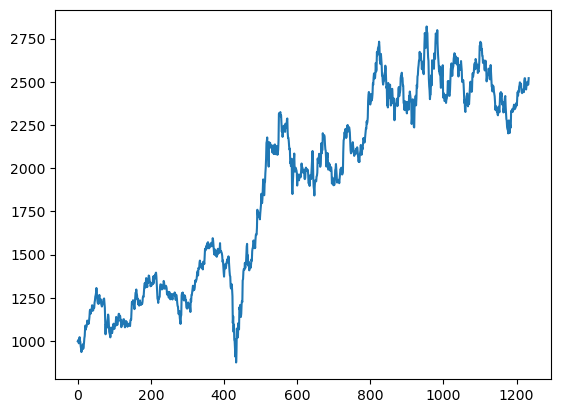

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data, so we apply MinMax scaler

In [11]:
## To transform the vales between 0 to 1

import numpy as np

In [12]:
df1

0        998.485352
1       1004.676697
2       1006.013977
3        986.697083
4       1009.679260
           ...     
1229    2498.149902
1230    2499.649902
1231    2481.949951
1232    2484.149902
1233    2520.850098
Name: Close, Length: 1234, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
 print(df1)

[[0.06313281]
 [0.06631749]
 [0.06700535]
 ...
 [0.82619211]
 [0.82732371]
 [0.84620143]]


## splitting dataset into train and test split

In [15]:

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(802, 432)

In [17]:
train_data

array([[0.06313281],
       [0.06631749],
       [0.06700535],
       [0.0570692 ],
       [0.06889069],
       [0.07536193],
       [0.06545124],
       [0.06134941],
       [0.04835597],
       [0.04168092],
       [0.03103137],
       [0.04504392],
       [0.03900577],
       [0.04445793],
       [0.05403741],
       [0.04099302],
       [0.04764258],
       [0.05760423],
       [0.07217725],
       [0.07885231],
       [0.10104308],
       [0.10993466],
       [0.09790935],
       [0.10613856],
       [0.10624047],
       [0.11250786],
       [0.12463508],
       [0.12038036],
       [0.1156161 ],
       [0.11775617],
       [0.1154632 ],
       [0.12524653],
       [0.13622726],
       [0.15385759],
       [0.15709317],
       [0.14486404],
       [0.14924616],
       [0.15722057],
       [0.15294035],
       [0.17001016],
       [0.17013756],
       [0.16313131],
       [0.15472378],
       [0.16639238],
       [0.16139887],
       [0.162902  ],
       [0.1787744 ],
       [0.185

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)


(701, 100)
(701,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(331, 100)
(331,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [33]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.56.0-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 11s 427ms/step - loss: 0.0557 - val_loss: 0.0327
Epoch 2/100
11/11 [==============================] - 3s 255ms/step - loss: 0.0091 - val_loss: 0.0038
Epoch 3/100
11/11 [==============================] - 2s 231ms/step - loss: 0.0050 - val_loss: 0.0164
Epoch 4/100
11/11 [==============================] - 2s 200ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 5/100
11/11 [==============================] - 2s 217ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 6/100
11/11 [==============================] - 2s 218ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 7/100
11/11 [==============================] - 2s 193ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 8/100
11/11 [==============================] - 2s 201ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 9/100
11/11 [==============================] - 2s 198ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 10/100
11/11 [==============================] - 2s 183ms/step - loss: 0.0024 - val_l

11/11 [==============================] - 2s 199ms/step - loss: 7.6890e-04 - val_loss: 8.4914e-04
Epoch 81/100
11/11 [==============================] - 2s 199ms/step - loss: 7.2754e-04 - val_loss: 8.8974e-04
Epoch 82/100
11/11 [==============================] - 2s 195ms/step - loss: 7.8174e-04 - val_loss: 0.0013
Epoch 83/100
11/11 [==============================] - 2s 197ms/step - loss: 8.3127e-04 - val_loss: 0.0029
Epoch 84/100
11/11 [==============================] - 2s 192ms/step - loss: 9.9748e-04 - val_loss: 0.0033
Epoch 85/100
11/11 [==============================] - 2s 193ms/step - loss: 8.7579e-04 - val_loss: 8.1330e-04
Epoch 86/100
11/11 [==============================] - 2s 192ms/step - loss: 7.5983e-04 - val_loss: 8.0112e-04
Epoch 87/100
11/11 [==============================] - 2s 191ms/step - loss: 7.6064e-04 - val_loss: 0.0013
Epoch 88/100
11/11 [==============================] - 2s 194ms/step - loss: 7.1540e-04 - val_loss: 0.0012
Epoch 89/100
11/11 [=======================

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.13.0'

## Prediction and check performance metrics

In [40]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 39ms/step


In [41]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1704.973315609115

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2490.746874933814

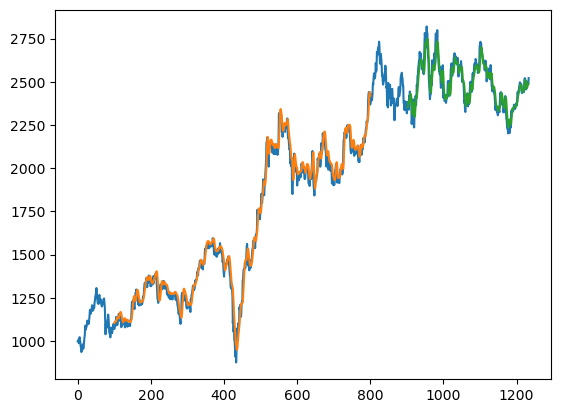

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

432

In [53]:
x_input=test_data[332:].reshape(1,-1)
x_input.shape

(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.8067230363316265,
 0.8245718751040052,
 0.8224628811128336,
 0.8210998338405016,
 0.8059770896127869,
 0.7996246156551268,
 0.7922432627082643,
 0.7750631385688598,
 0.7518133467199195,
 0.7633353295410217,
 0.760300558697373,
 0.753124905935008,
 0.7464637556783633,
 0.7475182526739492,
 0.7384909201843919,
 0.735636105496619,
 0.7593231677654142,
 0.7614321617565858,
 0.7514531823636914,
 0.744612075951171,
 0.7727741884218122,
 0.8004732864439768,
 0.7994960215342561,
 0.8047168924327035,
 0.7914459539544194,
 0.8015792714968062,
 0.7731855887908072,
 0.7673217472880074,
 0.7756546211159687,
 0.7675018294661216,
 0.7442005495599378,
 0.7551824118689361,
 0.7460008672521248,
 0.7765290359334405,
 0.7885140332030194,
 0.7929634653984821,
 0.7630781412992806,
 0.7442776556235646,
 0.7246284991589989,
 0.7202305550207797,
 0.700221360222224,
 0.6944859868180564,
 0.6930458334820973,
 0.6818066569091197,
 0.7170157019990171,
 0.720564975348386,
 0.705750907419656,
 0.6828611539047054,

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt

In [58]:
len(df1)

1234

## demonstrate prediction for next 10 days

In [62]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8338676]
101
1 day input [0.82457188 0.82246288 0.82109983 0.80597709 0.79962462 0.79224326
 0.77506314 0.75181335 0.76333533 0.76030056 0.75312491 0.74646376
 0.74751825 0.73849092 0.73563611 0.75932317 0.76143216 0.75145318
 0.74461208 0.77277419 0.80047329 0.79949602 0.80471689 0.79144595
 0.80157927 0.77318559 0.76732175 0.77565462 0.76750183 0.74420055
 0.75518241 0.74600087 0.77652904 0.78851403 0.79296347 0.76307814
 0.74427766 0.7246285  0.72023056 0.70022136 0.69448599 0.69304583
 0.68180666 0.7170157  0.72056498 0.70575091 0.68286115 0.70047855
 0.70585376 0.69901253 0.74857275 0.74877845 0.74589802 0.75392221
 0.74538364 0.75129897 0.75659695 0.76114923 0.767296   0.75335648
 0.75934891 0.7562884  0.75780578 0.76243517 0.77171969 0.76454416
 0.77223407 0.7945837  0.80515416 0.794378   0.80872905 0.8055142
 0.8210226  0.82495766 0.8337278  0.82534344 0.82742669 0.82994708
 0.81171246 0.804254   0.80155353 0.80561705 0.81232969 0.81209825
 0.80474264 0.8045883  0.83882008 0

9 day output [[0.8301941]]
10 day input [0.76030056 0.75312491 0.74646376 0.74751825 0.73849092 0.73563611
 0.75932317 0.76143216 0.75145318 0.74461208 0.77277419 0.80047329
 0.79949602 0.80471689 0.79144595 0.80157927 0.77318559 0.76732175
 0.77565462 0.76750183 0.74420055 0.75518241 0.74600087 0.77652904
 0.78851403 0.79296347 0.76307814 0.74427766 0.7246285  0.72023056
 0.70022136 0.69448599 0.69304583 0.68180666 0.7170157  0.72056498
 0.70575091 0.68286115 0.70047855 0.70585376 0.69901253 0.74857275
 0.74877845 0.74589802 0.75392221 0.74538364 0.75129897 0.75659695
 0.76114923 0.767296   0.75335648 0.75934891 0.7562884  0.75780578
 0.76243517 0.77171969 0.76454416 0.77223407 0.7945837  0.80515416
 0.794378   0.80872905 0.8055142  0.8210226  0.82495766 0.8337278
 0.82534344 0.82742669 0.82994708 0.81171246 0.804254   0.80155353
 0.80561705 0.81232969 0.81209825 0.80474264 0.8045883  0.83882008
 0.84607284 0.84573842 0.81999385 0.8165733  0.81243254 0.82377457
 0.82485481 0.83452498 

17 day output [[0.82805574]]
18 day input [0.75145318 0.74461208 0.77277419 0.80047329 0.79949602 0.80471689
 0.79144595 0.80157927 0.77318559 0.76732175 0.77565462 0.76750183
 0.74420055 0.75518241 0.74600087 0.77652904 0.78851403 0.79296347
 0.76307814 0.74427766 0.7246285  0.72023056 0.70022136 0.69448599
 0.69304583 0.68180666 0.7170157  0.72056498 0.70575091 0.68286115
 0.70047855 0.70585376 0.69901253 0.74857275 0.74877845 0.74589802
 0.75392221 0.74538364 0.75129897 0.75659695 0.76114923 0.767296
 0.75335648 0.75934891 0.7562884  0.75780578 0.76243517 0.77171969
 0.76454416 0.77223407 0.7945837  0.80515416 0.794378   0.80872905
 0.8055142  0.8210226  0.82495766 0.8337278  0.82534344 0.82742669
 0.82994708 0.81171246 0.804254   0.80155353 0.80561705 0.81232969
 0.81209825 0.80474264 0.8045883  0.83882008 0.84607284 0.84573842
 0.81999385 0.8165733  0.81243254 0.82377457 0.82485481 0.83452498
 0.83529655 0.82619211 0.82732371 0.84620143 0.83386761 0.83537692
 0.83524263 0.83451527

26 day output [[0.8252207]]
27 day input [0.76732175 0.77565462 0.76750183 0.74420055 0.75518241 0.74600087
 0.77652904 0.78851403 0.79296347 0.76307814 0.74427766 0.7246285
 0.72023056 0.70022136 0.69448599 0.69304583 0.68180666 0.7170157
 0.72056498 0.70575091 0.68286115 0.70047855 0.70585376 0.69901253
 0.74857275 0.74877845 0.74589802 0.75392221 0.74538364 0.75129897
 0.75659695 0.76114923 0.767296   0.75335648 0.75934891 0.7562884
 0.75780578 0.76243517 0.77171969 0.76454416 0.77223407 0.7945837
 0.80515416 0.794378   0.80872905 0.8055142  0.8210226  0.82495766
 0.8337278  0.82534344 0.82742669 0.82994708 0.81171246 0.804254
 0.80155353 0.80561705 0.81232969 0.81209825 0.80474264 0.8045883
 0.83882008 0.84607284 0.84573842 0.81999385 0.8165733  0.81243254
 0.82377457 0.82485481 0.83452498 0.83529655 0.82619211 0.82732371
 0.84620143 0.83386761 0.83537692 0.83524263 0.83451527 0.83362848
 0.83274376 0.83193284 0.83123237 0.83065468 0.83019412 0.8298319
 0.82954204 0.82929718 0.8290

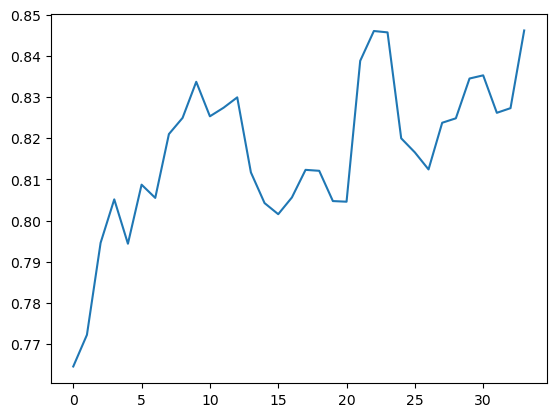

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

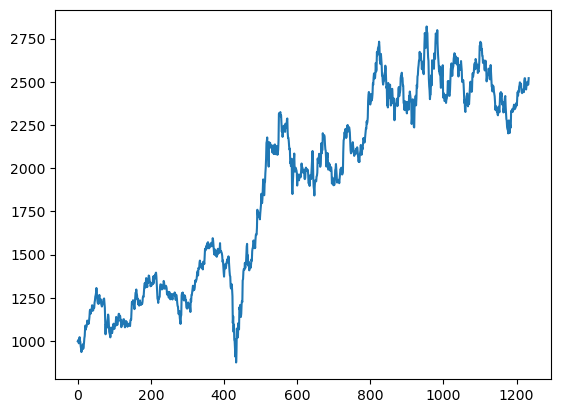

In [61]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)


